<a href="https://colab.research.google.com/github/Be-B/Data-Visualization/blob/main/5%E1%84%8C%E1%85%A1%E1%86%BC_%E1%84%85%E1%85%A9%E1%84%8C%E1%85%B5%E1%84%89%E1%85%B3%E1%84%90%E1%85%B5%E1%86%A8%E1%84%92%E1%85%AC%E1%84%80%E1%85%B1%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8_%E1%84%89%E1%85%A1%E1%86%BC%E1%84%80%E1%85%AA%E1%86%AB%E1%84%80%E1%85%AA%E1%86%AB%E1%84%80%E1%85%A8_%E1%84%90%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A1%E1%84%82%E1%85%B5%E1%86%A8_%EC%8B%A4%EC%8A%B5%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

!kaggle competitions download -c titanic

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## 데이터 확인

* Survived : 생존여부
* Pclass : 티켓의 클래스 (1st_1등석, 2nd_2등석, 3rd_3등석)
* Name : 승객 이름
* Sex : 성별
* Age : 나이
* Siblings/Spouses Aboard : 함께 탑승한 형제와 배우자의 수
* Parents/Children Aboard : 함께 탐슥한 부모와 아이의 수
* Fare : 요금

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [ ]:
# 데이터에 null이 포함되어 있는지 확인
data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [ ]:
# 만약 데이터의 빈 셀이 있을 때 데이터 채우기
data['Age'] = data['Age'].fillna(data['Age'].median())

In [ ]:
# Survived count
data['Survived'].value_counts()

0    545
1    342
Name: Survived, dtype: int64

## 데이터 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

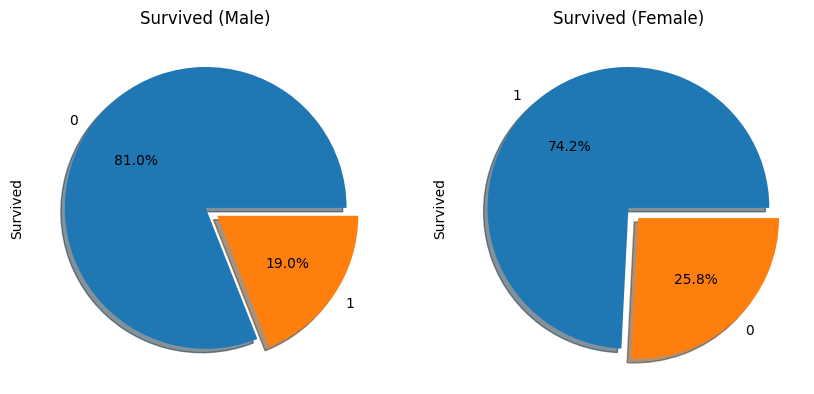

In [ ]:
# 성별 별 생존자 비율
f, ax = plt.subplots(1, 2, figsize=(10,5))  # 몇행, 몇열, 사이즈

# 파이 차트 생성(explode:원점에서 튀어나오게, autopct:퍼센트, ax:열번호, shadow:그림자)
data['Survived'][data['Sex'] == 'male'].value_counts().plot.pie(explode=[0,0.1],
                                                                autopct= '%1.1f%%',
                                                                ax=ax[0], shadow=True)
data['Survived'][data['Sex'] == 'female'].value_counts().plot.pie(explode=[0,0.1],
                                                                  autopct= '%1.1f%%',
                                                                  ax=ax[1], shadow=True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')

plt.show()

## 데이터 모델링 - 상관계수

* pearson 상관계수 : 두 변수 간의 선형 상관관계를 수치화
  - +1과 -1 사이의 값을 가짐 (+1:완벽한 양의 선형관계, -1: 완벽한 읨의 상관관계)

  
  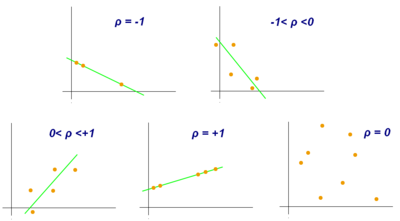

In [ ]:
# 상관계수 구하기


In [ ]:
data_corr

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000


In [ ]:
# 특정 변수 사이의 상관계수 구하기
data['Survived'].corr(data['Pclass'])

-0.336528299945714

### 상관관계 시각화

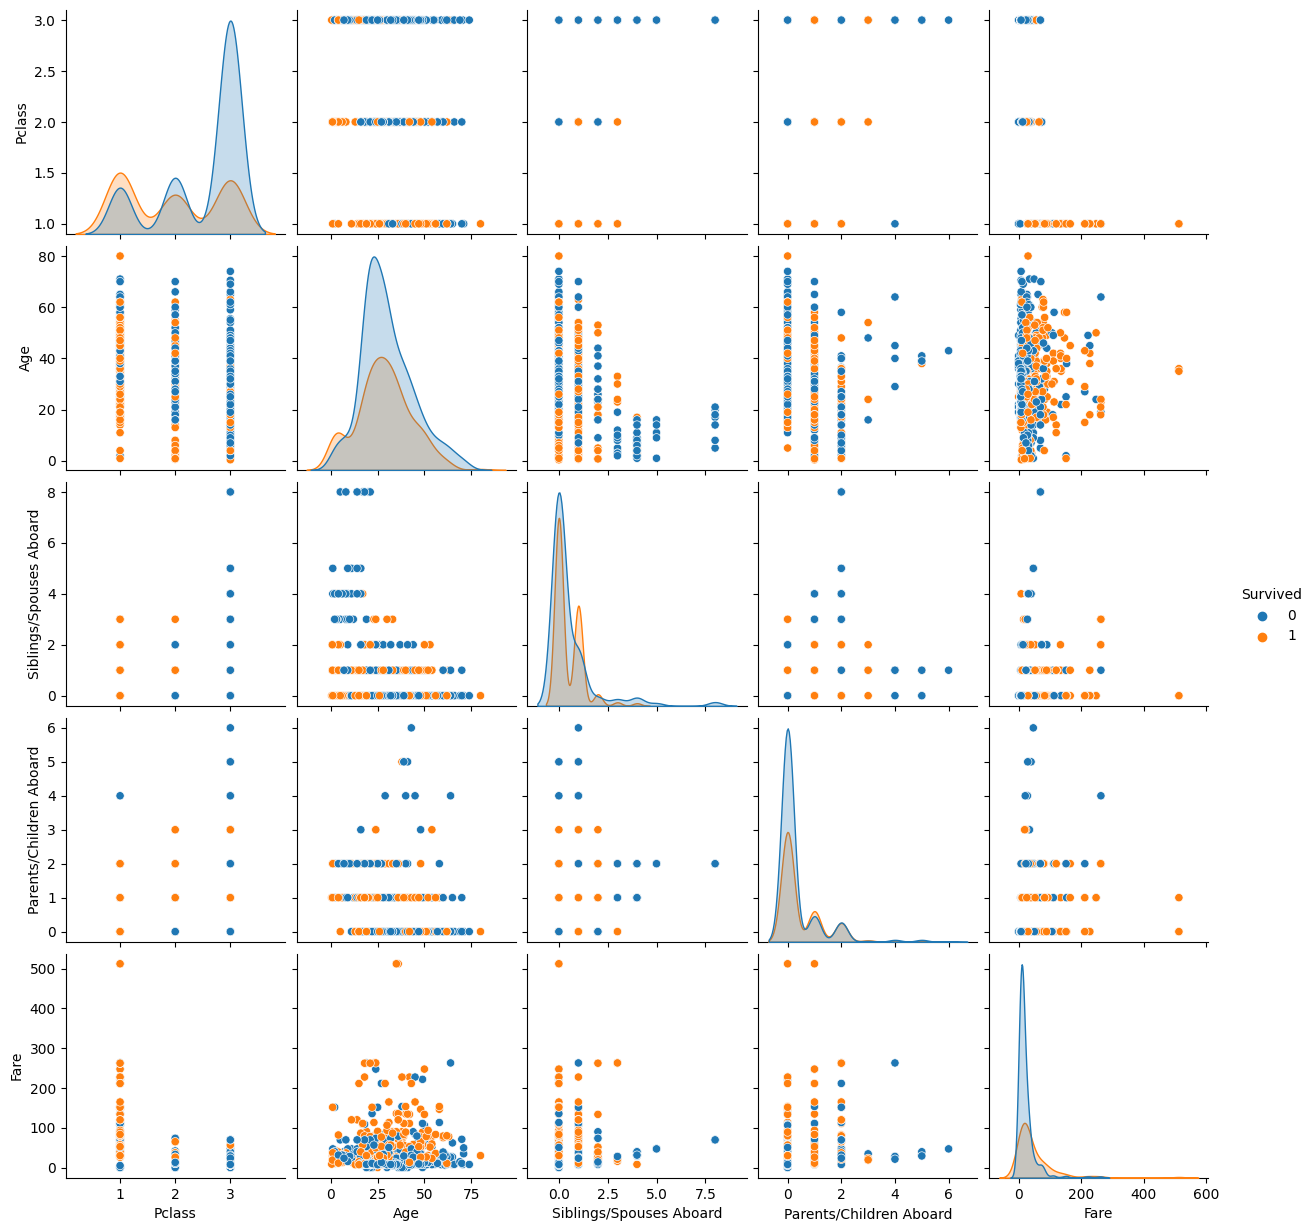

In [ ]:
# 상관관계 분석 시각화 (산점도scatter plot)
sns.pairplot(data, hue='Survived')
plt.show()

# 그래프 해석
## pclass, sibsp, parch, alone 변수는 일정한 수치를 보아 정수형 or boolean

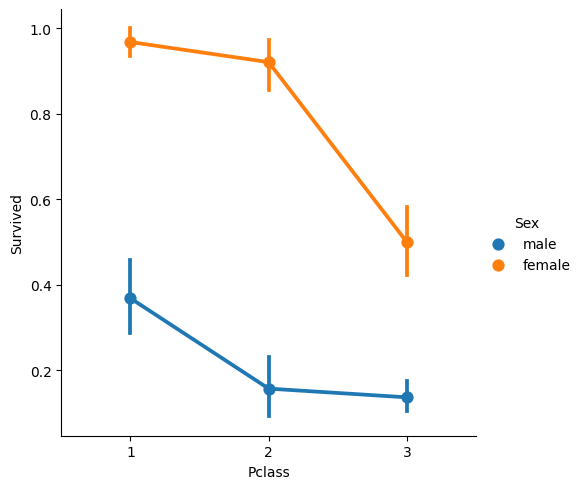

In [ ]:
# 티켓 클래스별 생존 상관관계
sns.catplot(x="Pclass", y='Survived', hue='Sex', data=data, kind='point')
plt.show()

### 상관계수 히트맵

In [ ]:
# 변수는 age
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [ ]:
data['Age2'] = data['Age'].apply(category_age)

In [ ]:
data['Sex'] = data['Sex'].map({'male':0, 'female':1})

In [ ]:
data['family'] = data['sibsp'] + data['parch'] + 1

In [ ]:
data.to_csv('/content/titanic_data.csv', index=False)

In [ ]:
# 첫 행 출력
print(data.iloc[0])

Survived                                        0
Pclass                                          3
Name                       Mr. Owen Harris Braund
Sex                                             0
Age                                          22.0
Siblings/Spouses Aboard                         1
Parents/Children Aboard                         0
Fare                                         7.25
Age2                                            2
Name: 0, dtype: object


In [ ]:
heatmap_data = data[['Survived', 'Pclass', 'Sex', 'Age2', 'Fare']]

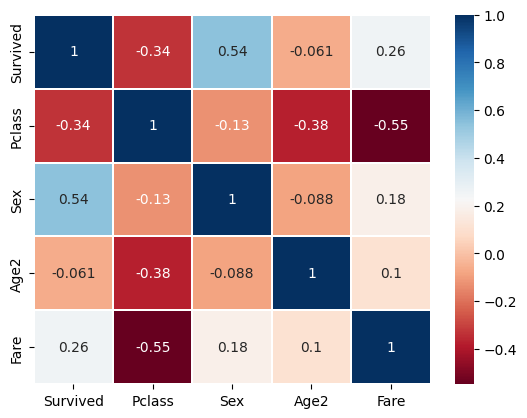

In [ ]:
colormap = plt.cm.RdBu

# 상관관계 데이터, cell 사이 선, 최댓값, cmap 히트맵 색, cell사이 색상, 각 cell 값 표기 유무, cell 값 글씨 사이즈
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
            cmap=colormap, linecolor='white', annot=True, annot_kws={"size":10})

plt.show()

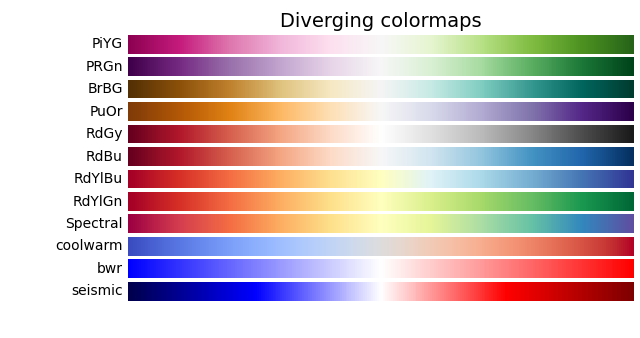

## 데이터 전처리

In [ ]:
# target 데이터 저장
target = data['Survived']

data.drop(labels=['Name', 'Survived', 'Age2'], axis=1, inplace=True)

data

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
882,2,0,27.0,0,0,13.0000
883,1,1,19.0,0,0,30.0000
884,3,1,7.0,1,2,23.4500
885,1,0,26.0,0,0,30.0000


## 분석 모델 구축

## 결과 분석


## 실시간 적용

In [ ]:
# 내가 탔을 때 가정한 조건
# 2등석, 남자, 23세, 동생1명, 요금 30.5 지불
pred=lr_titanic.predict([[2,0,23.0,1,0,30.5]])

if(pred[0]==0):
  print("AI 답변 : 힘드실 것으로 예측됩니다.\n")
else:
  print("AI 답변 : 생존하실 것으로 예측됩니다.\n")

print("사망/생존 : {}".format(lr_titanic.predict_proba([[2,0,23.0,1,0,30.5]])))

AI 답변 : 힘드실 것으로 예측됩니다.

사망/생존 : [[0.77153448 0.22846552]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
